# WeRateDogs twitter data wrangling

#### Devin McCormack

Gathering Data for this Project

Gather each of the three pieces of data as described below in a Jupyter Notebook titled wrangle_act.ipynb:

1. The WeRateDogs Twitter archive. I am giving this file to you, so imagine it as a file on hand. Download this file manually by clicking the following link: twitter_archive_enhanced.csv

1. The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

1. Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count. Note: do not include your Twitter API keys, secrets, and tokens in your project submission.

## Gather

### Import manually downloaded WeRateDogs twitter archive from 'twitter-archive-enhanced.csv'

In [1]:
import pandas as pd
import requests
import os

In [2]:
df_dog=pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
df_dog.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Programatically request for the image predictions from Udacity servers

In [4]:
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response=requests.get(url)

with open(url.split('/')[-1],mode='wb') as file:
    file.write(response.content)

df_breed=pd.read_csv('image-predictions.tsv',sep='\t')

df_breed.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Use Twiter API to access each tweet's json file and read into a dataframe

In [5]:
import tweepy

accesskey=pd.read_csv('twittertoken.csv')

consumer_key = accesskey.consumer_key[0]
consumer_secret = accesskey.consumer_secret[0]
access_token = accesskey.access_token[0]
access_secret = accesskey.access_secret[0]

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth_handler=auth,wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [6]:
# api.get_status(id_of_tweet)
import json
# try:
#     os.remove('tweet_json.txt')
# except:
#     pass
if os.path.isfile('tweet_json.txt'):
    print('file already exists')
else:
    count=0
    for tweet_id in df_dog.tweet_id:
        try:
            tweet=api.get_status(tweet_id,tweet_mode='extended')
            writetweet=tweet._json
            with open('tweet_json.txt',mode='a',encoding='utf-8') as file:
                json.dump(writetweet,file)
                file.write('\n')
            count+=1
            print(count,tweet._json.get('id_str'))
        except:
            with open('tweet_json.txt',mode='a',encoding='utf-8') as file:
                file.write('\n')
            count+=1
            print(count,'TWEET NOT FOUND!')




file already exists


Probe pretty-printed example of JSON, compare with [tweet data dictionary](https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/tweet-object) to find important attributes

In [7]:
with open('tweet_json.txt',mode='r') as file:
    tweet=json.dumps(json.loads(file.readline()),indent=4)
print(tweet)   

{
    "created_at": "Tue Aug 01 16:23:56 +0000 2017",
    "id": 892420643555336193,
    "id_str": "892420643555336193",
    "full_text": "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
    "truncated": false,
    "display_text_range": [
        0,
        85
    ],
    "entities": {
        "hashtags": [],
        "symbols": [],
        "user_mentions": [],
        "urls": [],
        "media": [
            {
                "id": 892420639486877696,
                "id_str": "892420639486877696",
                "indices": [
                    86,
                    109
                ],
                "media_url": "http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg",
                "media_url_https": "https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg",
                "url": "https://t.co/MgUWQ76dJU",
                "display_url": "pic.twitter.com/MgUWQ76dJU",
                "expanded_url": "https://twitter.com/dog_rat

dict keys of important features:

 'id_str','favorite_count', 'retweet_count'
 
Features that might be interesting: 

'followers_count' under user - do we need to normalize favorites/retweets by the number of current followers?



In [8]:
with open('tweet_json.txt',mode='r') as file:
    tweet=json.loads(file.readline())

In [275]:
## twitter suggests grabbing id_str to ensure that full number is grabbed
## there are potential issues with assigned int types
tweet.get('id_str')

'666020888022790149'

In [10]:
tweet.get('favorite_count')

39140

In [11]:
tweet.get('retweet_count')

8704

In [12]:
tweet.get('user').get('followers_count')

5627901

#### Put together loop to create dataframe from twitter JSON txt file

In [13]:
df_list=[]
with open('tweet_json.txt',mode='r') as file:
    content = file.read().splitlines()
    for line in content:
        try:
            tweet=json.loads(line)
            tweet_id=tweet.get('id_str')
            favorite_count=tweet.get('favorite_count')
            retweet_count=tweet.get('retweet_count')
            created_at=tweet.get('created_at')
            followers_count=tweet.get('user').get('followers_count')
            df_list.append({'tweet_id': tweet_id,
                            'favorite_count': favorite_count,
                            'retweet_count': retweet_count,
                            'followers_count': followers_count})
        
        except:
            pass
        
        
        
df_tweet = pd.DataFrame(df_list, columns = ['tweet_id', 'favorite_count', 'retweet_count','followers_count'])

df_tweet.head()

,tweet_id,favorite_count,retweet_count,followers_count
0,892420643555336193,39140,8704,5627901
1,892177421306343426,33522,6388,5627901
2,891815181378084864,25264,4245,5627901
3,891689557279858688,42487,8801,5627901
4,891327558926688256,40664,9583,5627901


## Assess

After gathering each of the above pieces of data, assess them visually and programmatically for quality and tidiness issues. Detect and document at least eight (8) quality issues and two (2) tidiness issues in your wrangle_act.ipynb Jupyter Notebook. To meet specifications, the issues that satisfy the Project Motivation (see the Key Points header on the previous page) must be assessed.

In [16]:
df_dog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [18]:
df_dog.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [24]:
df_dog.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [25]:
df_dog.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [27]:
df_dog[df_dog.rating_numerator==2]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1761,678675843183484930,NaN,NaN,2015-12-20 20:38:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Exotic pup here. Tail long af. Throat looks sw...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678675843...,2,10,None,None,None,None,None
1764,678424312106393600,NaN,NaN,2015-12-20 03:58:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Crystal. She's a shitty fireman. No se...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678424312...,2,10,Crystal,None,None,None,None
1920,674265582246694913,NaN,NaN,2015-12-08 16:33:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Henry. He's a shit dog. Short pointy e...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674265582...,2,10,Henry,None,None,None,None
2079,670826280409919488,NaN,NaN,2015-11-29 04:47:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Scary dog here. Too many legs. Extra tail. Not...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670826280...,2,10,None,None,None,None,None
2237,668142349051129856,NaN,NaN,2015-11-21 19:02:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This lil pup is Oliver. Hops around. Has wings...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668142349...,2,10,None,None,None,None,None
2246,667878741721415682,NaN,NaN,2015-11-21 01:34:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tedrick. He lives on the edge. Needs s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667878741...,2,10,Tedrick,None,None,None,None
2310,666786068205871104,NaN,NaN,2015-11-18 01:12:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Unfamiliar with this breed. Ears pointy af. Wo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666786068...,2,10,None,None,None,None,None
2326,666411507551481857,NaN,NaN,2015-11-17 00:24:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is quite the dog. Gets really excited whe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666411507...,2,10,quite,None,None,None,None
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None


In [102]:
df_dog[df_dog.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [35]:
df_dog.name.value_counts()

None         745
a             55
Charlie       12
Oliver        11
Lucy          11
Cooper        11
Lola          10
Tucker        10
Penny         10
Bo             9
Winston        9
Sadie          8
the            8
Toby           7
Daisy          7
Bailey         7
Buddy          7
an             7
Jack           6
Leo            6
Oscar          6
Stanley        6
Bella          6
Koda           6
Rusty          6
Dave           6
Milo           6
Scout          6
Jax            6
Gus            5
            ... 
Chef           1
Jangle         1
Lili           1
Tonks          1
Jordy          1
Chuck          1
Willy          1
Duchess        1
Genevieve      1
Sailer         1
Tuco           1
Bookstore      1
Mauve          1
Banditt        1
Dotsy          1
Cuddles        1
Harnold        1
Blue           1
Bowie          1
Rodman         1
Schnozz        1
Batdog         1
Mabel          1
Snicku         1
Kaiya          1
Willem         1
Rumpole        1
Pawnd         

In [28]:
df_dog.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [33]:
df_dog[df_dog.doggo!='None']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None
43,884162670584377345,NaN,NaN,2017-07-09 21:29:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,doggo,None,None,None
99,872967104147763200,NaN,NaN,2017-06-09 00:02:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very large dog. He has a date later. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/872967104...,12,10,None,doggo,None,None,None
108,871515927908634625,NaN,NaN,2017-06-04 23:56:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Napolean. He's a Raggedy East Nicaragu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/871515927...,12,10,Napolean,doggo,None,None,None
110,871102520638267392,NaN,NaN,2017-06-03 20:33:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,NaN,NaN,NaN,https://twitter.com/animalcog/status/871075758...,14,10,None,doggo,None,None,None
121,869596645499047938,NaN,NaN,2017-05-30 16:49:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Scout. He just graduated. Officially a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/869596645...,12,10,Scout,doggo,None,None,None
172,858843525470990336,NaN,NaN,2017-05-01 00:40:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have stumbled puppon a doggo painting party....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/858843525...,13,10,None,doggo,None,None,None
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,None,None,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None
211,851953902622658560,NaN,NaN,2017-04-12 00:23:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Astrid. She's a guide d...,8.293743e+17,4.196984e+09,2017-02-08 17:00:26 +0000,https://twitter.com/dog_rates/status/829374341...,13,10,Astrid,doggo,None,None,None


In [37]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2347 entries, 0 to 2346
Data columns (total 4 columns):
tweet_id           2347 non-null object
favorite_count     2347 non-null int64
retweet_count      2347 non-null int64
followers_count    2347 non-null int64
dtypes: int64(3), object(1)
memory usage: 73.4+ KB


In [38]:
df_tweet.describe()

,favorite_count,retweet_count,followers_count
count,2347.000000,2347.000000,2.347000e+03
mean,8118.085215,3065.134214,5.628142e+06
std,12204.073905,5090.205399,1.999712e+02
min,0.000000,0.000000,5.627901e+06
25%,1408.500000,611.500000,5.627924e+06
50%,3568.000000,1433.000000,5.628174e+06
75%,10054.000000,3576.000000,5.628198e+06
max,144100.000000,78219.000000,5.628722e+06


In [96]:
df_breed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [97]:
df_breed.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [39]:
df_breed

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


Some images are not categorized as dogs, with high confidence. Maybe these aren't dogs at all?

In [90]:
url=df_breed.jpg_url[df_breed.tweet_id==666051853826850816].iloc[0]

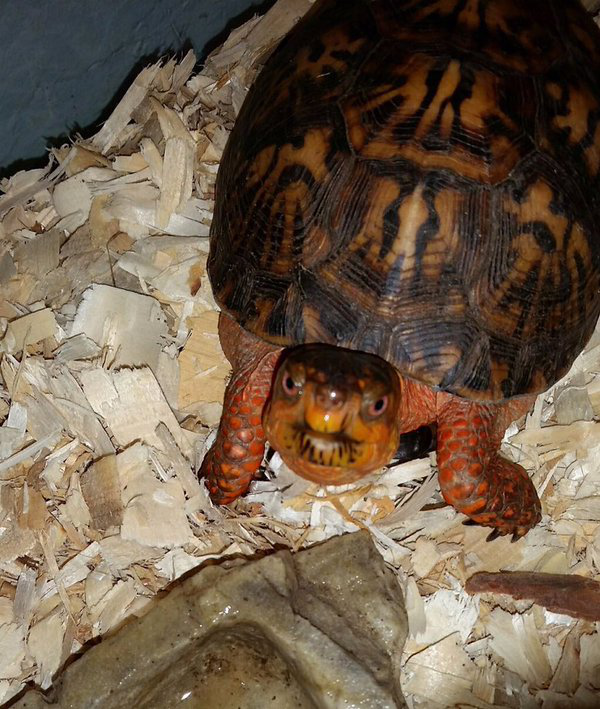

In [91]:
from PIL import Image
from io import BytesIO
r=requests.get(url)
i = Image.open(BytesIO(r.content))
i

In [95]:
list(df_dog.text[df_dog.tweet_id==666051853826850816])

["This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well. 2/10 https://t.co/v5A4vzSDdc"]

This one is clearly not a dog (the NN did not make a classification mistake). Additionally, this type of image can explain some of the really low ratings for some images.

## `df_dog` Quality issues:


- datatypes: timestamp is object not datetime
- There are tweets that do not include ratings (no rating_denominator or rating_numerator)
- there are 181 retweets
- some tweets have oddly low ratings, may not have been programmatically extracted correctly
- name is extracted programmatically as the word following "this is", sometimes this word is not a name, e.g. "a", "an", "the".
- some images can have multiple dog stages (multiple dogs?)
- after removing retweets and replies, the in_reply_to... and retweet... columns can be removed


## `df_tweet` Quality issues:
- tweet_id doesn't match data type of `df_dog`
- there are 2356 tweets in `df_dog` but only 2347 in `df_tweets`. Some tweets were deleted


## `df_breed` Quality issues:
- Some images are not classified as dogs (because they are not dogs)
- there are 2356 tweets in `df_dog` but only 2075 classified dogs in `df_breed`.


## Tidyness issues:

- the three sources can be joined into 1 table, as all values are measured on the same unit, tweet_id.

- dog "stages" can be combined together into one category.

## Clean

#### Define

- dog "stages" can be combined together into one category.

create one column with output of "doggo", "floofer", "pupper", "puppo" or "multiple" change data type to category

#### Code

In [237]:
df_dog_clean=df_dog.copy()
df_tweet_clean=df_tweet.copy()
df_breed_clean=df_breed.copy()

In [238]:
df_dog.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [239]:
a=df_dog.doggo=="doggo"
b=df_dog.pupper=="pupper"

len(df_dog[a&b])

12

there should be 257-12=245 puppers

In [240]:
df_dog_clean[df_dog_clean.tweet_id==817777686764523521]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo,None,pupper,None


In [241]:
df_dog.iloc[:,13:].head()

,doggo,floofer,pupper,puppo
0,None,None,None,None
1,None,None,None,None
2,None,None,None,None
3,None,None,None,None
4,None,None,None,None


In [242]:
df_dog_clean['stage']=df_dog_clean.doggo+df_dog_clean.floofer+df_dog_clean.pupper+df_dog_clean.puppo



replace_all function from https://gomputor.wordpress.com/2008/09/27/search-replace-multiple-words-or-characters-with-python/


In [243]:
rep = {"NoneNoneNoneNone": "None",
        "doggoNoneNoneNone": "doggo",
        "NoneflooferNoneNone": "floofer",
        "NoneNonepupperNone": "pupper",
        "NoneNoneNonepuppo": "puppo"}

def replace_all(text, dic):
    for i, j in dic.items():
        text = text.replace(i, j)
    return text

df_stage=replace_all(df_dog_clean.stage.str,rep)

df_stage.value_counts()

None                    1976
pupper                   245
doggo                     83
puppo                     29
doggoNonepupperNone       12
floofer                    9
doggoNoneNonepuppo         1
doggoflooferNoneNone       1
Name: stage, dtype: int64

In [244]:
df_stage=df_stage.str.replace(r'^doggo\w+','multiple')
df_stage.value_counts()

None        1976
pupper       245
doggo         83
puppo         29
multiple      14
floofer        9
Name: stage, dtype: int64

In [245]:
df_dog_clean['dog_stage']=df_stage
df_dog_clean.drop('stage',axis=1,inplace=True) #inplace because not in original df


#### Test

In [246]:
df_dog_clean.dog_stage.value_counts()

None        1976
pupper       245
doggo         83
puppo         29
multiple      14
floofer        9
Name: dog_stage, dtype: int64

In [248]:
a=df_dog.doggo=="doggo"
b=df_dog.pupper=="pupper"

df_dog_clean[a&b].iloc[:,13:].head()

,doggo,floofer,pupper,puppo,dog_stage
460,doggo,None,pupper,None,multiple
531,doggo,None,pupper,None,multiple
565,doggo,None,pupper,None,multiple
575,doggo,None,pupper,None,multiple
705,doggo,None,pupper,None,multiple


#### drop doggo, floofer, pupper and puppo columns after the test

In [252]:
df_dog_clean.drop(['doggo','floofer','pupper','puppo'],axis=1,inplace=True)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### change dog_stage type to category

In [257]:
df_dog_clean.dog_stage.astype('category')
df_dog_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
dog_stage                     2356 non-null object
dtypes: float64(4), int64(3), object(7)
memory usage: 257.8+ KB


## Clean

#### Define

- the three sources can be joined into 1 table, as all values are measured on the same unit, tweet_id.

merge the three tables on tweet_id with inner join. Make sure that all types are int64 before merging

#### Code

In [262]:
df_dog_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
dog_stage                     2356 non-null object
dtypes: float64(4), int64(3), object(7)
memory usage: 257.8+ KB


In [263]:
df_tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2347 entries, 0 to 2346
Data columns (total 4 columns):
tweet_id           2347 non-null object
favorite_count     2347 non-null int64
retweet_count      2347 non-null int64
followers_count    2347 non-null int64
dtypes: int64(3), object(1)
memory usage: 73.4+ KB


In [264]:
df_breed_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### change `df_tweet` to int64 type

In [278]:
df_tweet_clean.tweet_id=df_tweet_clean.tweet_id.astype('int64')
df_tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2347 entries, 0 to 2346
Data columns (total 4 columns):
tweet_id           2347 non-null int64
favorite_count     2347 non-null int64
retweet_count      2347 non-null int64
followers_count    2347 non-null int64
dtypes: int64(4)
memory usage: 73.4 KB


In [281]:
df_dog_clean=df_dog_clean.merge(df_tweet_clean,on='tweet_id')


In [282]:
df_dog_clean=df_dog_clean.merge(df_breed_clean, on='tweet_id')

#### Test

In [283]:
df_dog_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2070 entries, 0 to 2069
Data columns (total 28 columns):
tweet_id                      2070 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2070 non-null object
source                        2070 non-null object
text                          2070 non-null object
retweeted_status_id           76 non-null float64
retweeted_status_user_id      76 non-null float64
retweeted_status_timestamp    76 non-null object
expanded_urls                 2070 non-null object
rating_numerator              2070 non-null int64
rating_denominator            2070 non-null int64
name                          2070 non-null object
dog_stage                     2070 non-null object
favorite_count                2070 non-null int64
retweet_count                 2070 non-null int64
followers_count               2070 non-null int64
jpg_url                       2070 non

## Clean

#### Define

- there are retweets and replies included in the dataset

remove any tweet that has a retweeted_status_id or a in reply_to_status_id

#### Code

In [303]:
notretweets=df_dog_clean.retweeted_status_id.isnull()
notreplies=df_dog_clean.in_reply_to_status_id.isnull()
df_dog_clean=df_dog_clean[notreplies&notretweets]

#### Test

In [304]:
df_dog_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2069
Data columns (total 28 columns):
tweet_id                      1971 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1971 non-null object
source                        1971 non-null object
text                          1971 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1971 non-null object
rating_numerator              1971 non-null int64
rating_denominator            1971 non-null int64
name                          1971 non-null object
dog_stage                     1971 non-null object
favorite_count                1971 non-null int64
retweet_count                 1971 non-null int64
followers_count               1971 non-null int64
jpg_url                       1971 non-null

## Clean

#### Define

- after removing retweets and replies, the in_reply_to... and retweet... columns can be removed

drop in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp

#### Code

In [307]:
drop_cols=['in_reply_to_status_id',
           'in_reply_to_user_id',
           'retweeted_status_id',
           'retweeted_status_user_id',
           'retweeted_status_timestamp']

df_dog_clean=df_dog_clean.drop(drop_cols,axis=1)

#### Test

In [308]:
df_dog_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2069
Data columns (total 23 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null object
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
dog_stage             1971 non-null object
favorite_count        1971 non-null int64
retweet_count         1971 non-null int64
followers_count       1971 non-null int64
jpg_url               1971 non-null object
img_num               1971 non-null int64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null bool
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null bool
p3                    1971 non-null object

## Clean

#### Define

- name is extracted programmatically as the word following "this is", sometimes this word is not a name, e.g. "a", "an", "the".


Re-extract names requiring a capitalized word after template phrases that seem to proceed names. Probe misnamed dogs text to see if names are missed, or if the text simply has no name.


#### Code

In [528]:
df_dog_clean.name.value_counts()

None              524
a                  55
Charlie            11
Lucy               10
Cooper             10
Oliver             10
Tucker              9
Penny               9
Winston             8
Sadie               8
Lola                7
Toby                7
Daisy               7
the                 7
Stanley             6
an                  6
Bella               6
Koda                6
Bo                  6
Jax                 6
Oscar               5
Louis               5
Buddy               5
Bailey              5
Leo                 5
Dave                5
Scout               5
Rusty               5
Chester             5
Milo                5
Brody               4
Derek               4
one                 4
Larry               4
Winnie              4
Jerry               4
Jack                4
Gus                 4
Archie              4
Bentley             4
Reggie              4
Chip                4
very                4
Scooter             4
Alfie               4
Maggie    

In [529]:
df_dog_clean.text[df_dog_clean.name=='a']

50      Here is a pupper approaching maximum borkdrive...
520     Here is a perfect example of someone who has t...
643     Guys this is getting so out of hand. We only r...
819     This is a mighty rare blue-tailed hammer sherk...
821     Viewer discretion is advised. This is a terrib...
830     This is a carrot. We only rate dogs. Please on...
856     This is a very rare Great Alaskan Bush Pupper....
992     People please. This is a Deadly Mediterranean ...
1002    This is a taco. We only rate dogs. Please only...
1119    Here is a heartbreaking scene of an incredible...
1128    Here is a whole flock of puppers.  60/50 I'll ...
1138    This is a Butternut Cumberfloof. It's not wind...
1144    This is a Wild Tuscan Poofwiggle. Careful not ...
1156    "Pupper is a present to world. Here is a bow f...
1259    This is a rare Arctic Wubberfloof. Unamused by...
1472    Guys this really needs to stop. We've been ove...
1515    This is a dog swinging. I really enjoyed it so...
1577    This i

The base extraction seems to use "This is \w+|"Here is \w+" or a similar template to work, but it has a lot of false positives. Here we see that there are plenty of times that the dog name is not immediately after "This is ". One thing that should be focused on for regex extraction is that the dog names will always be capitalized. This will get rid of many false positives.

Also, looking at the list of false positives, there are actually names in some of the text. Two more keys that may pick up names are shown in these tweets:

In [530]:
df_dog_clean.text[1979]

'This is a southwest Coriander named Klint. Hat looks expensive. Still on house arrest :(\n9/10 https://t.co/IQTOMqDUIe'

In [531]:
df_dog_clean.text[2002]

"This is a Dasani Kingfisher from Maine. His name is Daryl. Daryl doesn't like being swallowed by a panda. 8/10 https://t.co/jpaeu6LNmW"

It makes sense that "name is" or "named" may proceed the name of the dog, and they should be included in the extraction.



In [532]:
# note to self: (?: ) is a non-capture group, needed for or statement
names=df_dog_clean.text.str.extract('(?:[Tt]his is |named |name is |[Hh]ere is )([A-Z][\w\']+)',expand=True)
names[0].value_counts().head(10)


Lucy       9
Cooper     9
Tucker     8
Penny      8
Oliver     8
Charlie    8
Bo         6
Bella      6
Koda       5
Oscar      5
Name: 0, dtype: int64

In [533]:
sum(names[0].isnull())

898

Next I need to probe the text of tweets that did not have a name extracted, maybe there are other key phrases that are missed. I can iterate over the names with new templates if necessary.

In [534]:
with pd.option_context('display.max_colwidth',-1):
    print(df_dog_clean.text[names[0].isnull()])


5       Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh       
6       Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl   
7       When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq                           
12      Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm                                       
21      I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba                                     
23      You may not have known you needed to see this today. 13/10 please enjoy (IG: emmylouroo) https://t.co/

A huge one I am missing is "Meet ". That makes sense. Also "Say hello to" pops up frequently.

In [535]:
names=df_dog_clean.text.str.extract('(?:[Tt]his is |[Mm]eet |hello to |named |name is |[Hh]ere is )([A-Z][\w\']+)',expand=True)
names[0].value_counts().head(10)


Charlie    11
Oliver     10
Lucy       10
Cooper     10
Tucker      9
Penny       9
Winston     8
Sadie       8
Daisy       7
Toby        7
Name: 0, dtype: int64

In [536]:
sum(names[0].isnull())

591

In [537]:
with pd.option_context('display.max_colwidth',-1):
    print(df_dog_clean.text[names[0].isnull()])


5       Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh   
7       When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq                       
12      Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm                                   
21      I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba                                 
23      You may not have known you needed to see this today. 13/10 please enjoy (IG: emmylouroo) https://t.co/WZqNqygEyV                                                     
24      This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate i

There are indeed still some missed dogs, but it would be hard to caputure them all without increasing false name extractions. Owner names, Holidays and famous people names are capitalized; and they create inventive breed names for dogs that are also capitalized. One idea would be to use the previously extracted names as a lookup table to match new names in the tweets that have no extracted names. However, since many dogs have human names, it would still require some manual cleanup. Here we also can see some examples of how images with mutliple dogs (and dog names) complicate things. In the scope of this project, The current extraction seems to do pretty well. There are only 591 tweets without names, and most are truely without names.


In [539]:
df_dog_clean['name']=names

#### Test

In [540]:
df_dog_clean.name.value_counts()

Charlie           11
Oliver            10
Lucy              10
Cooper            10
Tucker             9
Penny              9
Winston            8
Sadie              8
Daisy              7
Toby               7
Lola               7
Stanley            6
Bo                 6
Bella              6
Jax                6
Koda               6
Leo                5
Chester            5
Scout              5
Zoey               5
Bailey             5
Rusty              5
Buddy              5
Milo               5
Louis              5
Dave               5
Oscar              5
Cassie             4
Finn               4
Gary               4
Jerry              4
Archie             4
Scooter            4
Oakley             4
Jack               4
Bear               4
Larry              4
Clark              4
Winnie             4
Alfie              4
George             4
Derek              4
Dexter             4
Sophie             4
Maggie             4
Bentley            4
Gus                4
Duke         

In [549]:
df_dog_clean[['name','text']].sample(15,random_state=10)

,name,text
1249,NaN,Please only send in dogs. Don't submit other t...
771,NaN,Here's a doggo trying to catch some fish. 8/10...
1129,NaN,"""YOU CAN'T HANDLE THE TRUTH"" both 10/10 https:..."
1696,Schnozz,This is Schnozz. He's had a blurred tail since...
1131,Bella,This is Bella. Based on this picture she's at ...
906,Buckley,Meet Buckley. His family &amp; some neighbors ...
1028,NaN,I can't even comprehend how confused this dog ...
1963,Shaggy,This is Shaggy. He knows exactly how to solve ...
1516,Sandy,This is Sandy. He's sexually confused. Thinks ...
1782,Holly,Meet Holly. She's trying to teach small human-...


## Clean

#### Define

#### Code

#### Test

## Clean

#### Define

#### Code

#### Test

# Template

## Clean

#### Define

#### Code

#### Test